In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
train_data= pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
train_data.shape

(175000, 17)

In [3]:
test_data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
test_data.shape

(50000, 16)

In [4]:
train_data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type              object
extra                    float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
dtype: object

In [5]:
train_data.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [6]:
train_data.head(10)
# print(train_data.columns)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0
5,0,2023-06-29 16:31:14,2023-06-29 16:29:06,1.0,0.00,99.0,N,225,256,Credit Card,0.0,1.507831,0.0,1.0,44.70,0.0,0.0
6,1,2023-06-30 12:54:57,2023-06-30 11:52:20,1.0,1.33,1.0,N,214,240,Cash,0.0,0.094334,0.0,1.0,18.20,2.5,0.0
7,1,2023-06-30 17:16:44,2023-06-30 17:40:34,1.0,0.45,1.0,N,176,227,Cash,2.5,0.727105,0.0,1.0,13.70,2.5,0.0
8,0,2023-06-30 21:52:44,2023-06-30 21:54:13,3.0,3.80,1.0,N,196,139,Credit Card,3.5,6.590745,0.0,1.0,35.60,2.5,0.0
9,1,2023-06-29 11:12:12,2023-06-29 09:39:24,1.0,2.50,1.0,N,138,196,Credit Card,0.0,6.091603,0.0,1.0,23.10,2.5,0.0


In [7]:
print(train_data['store_and_fwd_flag'].value_counts())
print("--------------------------------------------------------")
print(train_data['PULocationID'].value_counts())
print("--------------------------------------------------------")
print(train_data['DOLocationID'].value_counts())
print("--------------------------------------------------------")
print(train_data['tolls_amount'].value_counts())
print("--------------------------------------------------------")
print(train_data['improvement_surcharge'].value_counts())
print("--------------------------------------------------------")
print(train_data['congestion_surcharge'].value_counts())
print("--------------------------------------------------------")
print(train_data['RatecodeID'].value_counts())
print("--------------------------------------------------------")
print(train_data['extra'].value_counts())
print("--------------------------------------------------------")
print(train_data['payment_type'].value_counts())

store_and_fwd_flag
N    167729
Y      1194
Name: count, dtype: int64
--------------------------------------------------------
PULocationID
264    730
85     725
43     719
162    718
97     717
      ... 
254    613
94     613
153    611
179    606
252    606
Name: count, Length: 264, dtype: int64
--------------------------------------------------------
DOLocationID
263    759
127    736
37     729
115    726
254    721
      ... 
9      611
140    610
195    607
187    606
183    605
Name: count, Length: 264, dtype: int64
--------------------------------------------------------
tolls_amount
0.00     159328
6.55      14011
12.75       254
14.75       209
3.00        132
          ...  
63.00         1
18.64         1
15.10         1
20.50         1
14.99         1
Name: count, Length: 214, dtype: int64
--------------------------------------------------------
improvement_surcharge
 1.0    173145
-1.0      1725
 0.3        85
 0.0        45
Name: count, dtype: int64
---------------------

# Data Preprocessing

In [8]:
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [9]:
X,y= train_data.iloc[:,[0,3,4,5,6,7,8,9,10,11,12,13,15,16]],train_data.iloc[:,14]
print(X.head(5))
print(y.head(5))

   VendorID  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0         1              1.0           2.14         1.0                  N   
1         0              1.0           2.70         1.0                  N   
2         1              1.0           1.15         1.0                  N   
3         0              1.0           0.40         1.0                  N   
4         1              3.0           1.10         1.0                  N   

   PULocationID  DOLocationID payment_type  extra  tip_amount  tolls_amount  \
0           120             9  Credit Card    2.5    7.165589           0.0   
1            15           215  Credit Card    3.5    6.067401           0.0   
2           167           223  Credit Card    0.0    4.111547           0.0   
3           128           239  Credit Card    2.5    6.411079           0.0   
4           203            52  Credit Card    1.0    4.769377           0.0   

   improvement_surcharge  congestion_surcharge  Airport_

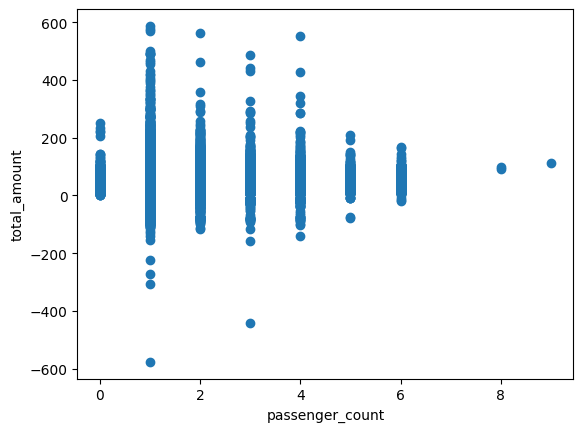

In [10]:
plt.scatter(X['passenger_count'],y)
plt.xlabel('passenger_count')
plt.ylabel('total_amount')
plt.show()

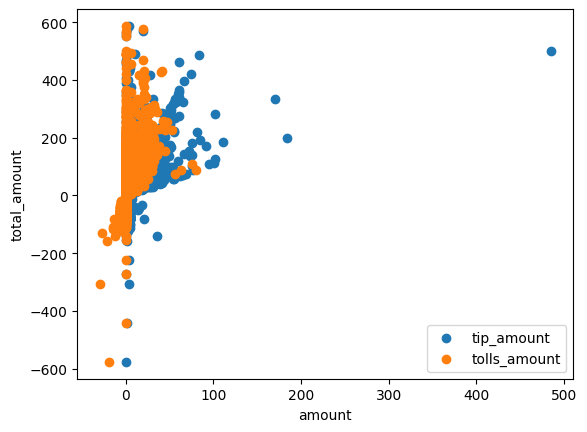

In [11]:
plt.scatter(X['tip_amount'],y,label='tip_amount')
plt.scatter(X['tolls_amount'],y,label='tolls_amount')
plt.xlabel('amount')
plt.ylabel('total_amount')
plt.legend()
plt.show()

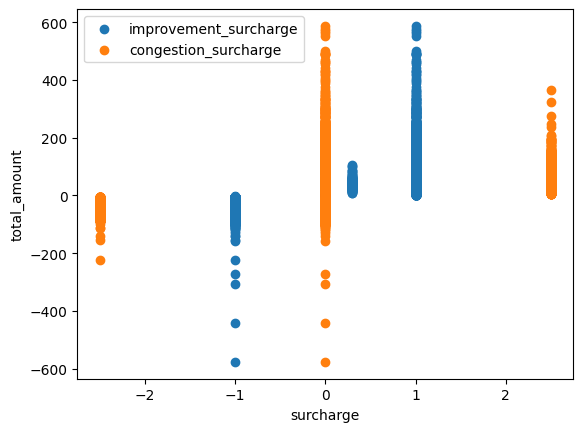

In [12]:
plt.scatter(X['improvement_surcharge'],y,label='improvement_surcharge')
plt.scatter(X['congestion_surcharge'],y,label='congestion_surcharge')
plt.xlabel('surcharge')
plt.ylabel('total_amount')
plt.legend()
plt.show()

In [13]:
test_data_rel = test_data.iloc[:,[0,3,4,5,6,7,8,9,10,11,12,13,14,15]]
print(test_data_rel.columns)

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')


In [14]:
X.isnull().sum()

VendorID                    0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [15]:
impute_transformer = ColumnTransformer(
[('numeric_imputer',SimpleImputer(strategy='mean'),[1,3,12,13]),
('categorical_imputer',SimpleImputer(strategy='most_frequent'),[4])],remainder="passthrough")

# res= impute_transformer.fit_transform(train_data)
scale_transformer = ColumnTransformer(
[('numeric',StandardScaler(),[0,1,2,3,5,6,7,8,10,11,12,13]),
('categorical',OneHotEncoder(),[4,9])],remainder="passthrough")

pipe = Pipeline(steps=[('impute',impute_transformer),('scale',scale_transformer)])

clean_data=pipe.fit_transform(X)
print(clean_data[0])

[-0.40846262 -0.08097858  0.31437535 -0.31575674  0.60955962 -0.00761053
 -0.16691511 -1.62354292  0.29143388  0.22514244 -0.27781016  0.10218345
  1.          0.          0.          1.          0.          0.
  0.        ]


In [16]:
clean_test_data=pipe.transform(test_data_rel)
print(clean_test_data[0])

[-4.08462625e-01 -8.09785790e-02  3.14375349e-01 -3.15756739e-01
  6.09559617e-01 -4.96063956e-04 -1.48013721e+00 -1.70229106e+00
 -4.78392313e-01 -1.29880260e-02 -2.77810165e-01  1.02183454e-01
  1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


# Feature Extraction Using RFECV

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV

rfe = DecisionTreeRegressor()

select = RFECV(estimator=rfe,step=1, cv=5)
select = select.fit(clean_data,y)

In [18]:
print(select.support_)

[ True  True  True False  True  True  True  True  True  True  True  True
 False False False  True False False False]


In [19]:
validation_test=clean_test_data[:,select.support_]

In [20]:
X_rfe=clean_data[:, select.support_]

In [21]:
print(len(X_rfe[0]))
print(len(clean_data[0]))
print(len(validation_test[0]))

12
19
12


In [22]:
y=y.values
print(y)

[20.64 25.55 17.64 ... 33.5  40.8  16.32]


# Train Test Splitting of Clean Training Data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size = 0.2, random_state = 42)

In [24]:
print(y_train)

[ 40.95  16.4  -74.   ...  23.5   13.7   23.88]


# Application Of Various Regression Models

## DecisionTreeRegressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [26]:
dtr_pred = dtr.predict(X_test)
print(r2_score(y_test,dtr_pred))

0.90475343593282


## LinearRegression

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
print(y_pred)

[25.74673565 31.97107938 28.04814139 ... 23.51433632 18.67945215
 22.65376901]


In [30]:
print(r2_score(y_test,y_pred))

0.6917183350115452


In [31]:
print(len(y_test))
print(len(y_pred))

35000
35000


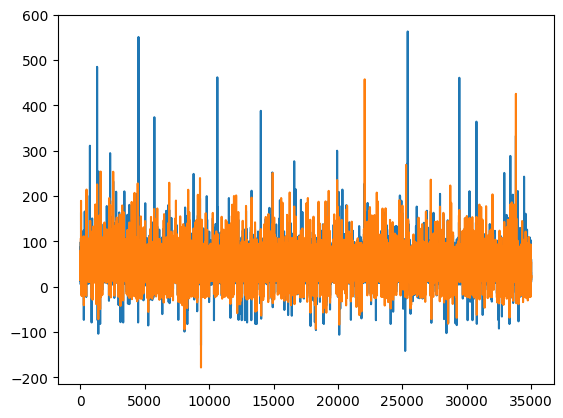

In [32]:
import matplotlib.pyplot as plt
# plt.scatter(np.arange(len(y_test)),y_test,marker='.')
# plt.scatter(np.arange(len(y_pred)),y_pred,marker='.')
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

In [33]:
result = lr.predict(validation_test)

In [34]:
print(result)

[23.97355224 25.99003944 26.38588889 ... 22.99039541 25.71473977
 21.51500395]


## SGDRegressor

In [35]:
from sklearn.linear_model import SGDRegressor

sgd=SGDRegressor()

sgd.fit(X_train,y_train)

SGDRegressor()

In [36]:
sgd_pred=sgd.predict(X_test)
print(r2_score(y_test,sgd_pred))

-1308574371240.0518


## RidgeCV

In [37]:
from sklearn.linear_model import RidgeCV
rcv=RidgeCV(cv=5)
rcv.fit(X_train,y_train)

RidgeCV(cv=5)

In [38]:
rcv_pred=rcv.predict(X_test)
print(r2_score(y_test,rcv_pred))

0.6917167365080847


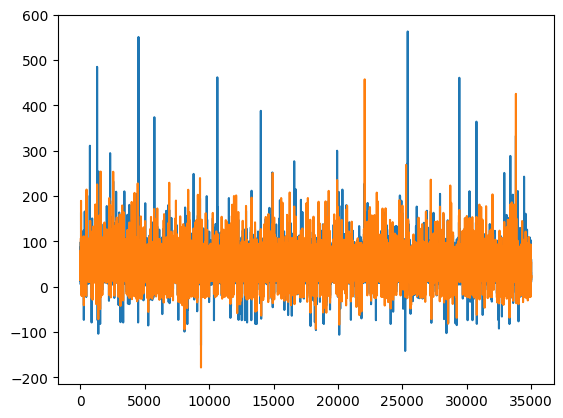

In [39]:
plt.plot(y_test)
plt.plot(rcv_pred)
plt.show()

## LassoCV

In [40]:
from sklearn.linear_model import LassoCV
lcv=LassoCV(cv=5)
lcv.fit(X_train,y_train)
lcv_pred=lcv.predict(X_test)

In [41]:
print(r2_score(y_test,lcv_pred))

0.6916425046017306


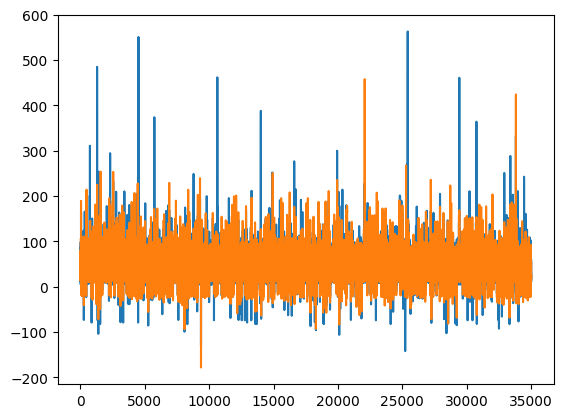

In [42]:
plt.plot(y_test)
plt.plot(lcv_pred)
plt.show()

## XGBRegressor

In [43]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
xgb_pred=xgb.predict(X_test)
print(r2_score(y_test,xgb_pred))

0.9560780206057387


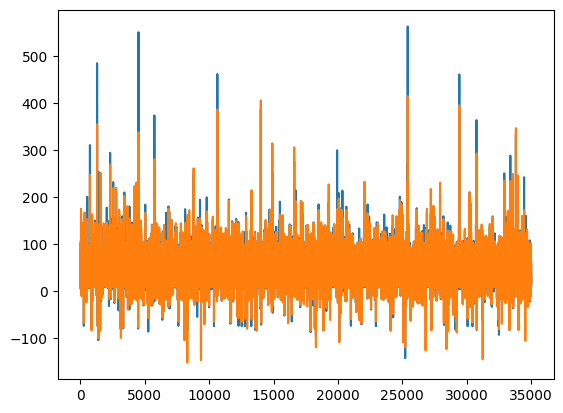

In [45]:
plt.plot(y_test)
plt.plot(xgb_pred)
plt.show()

## GradientBoostingRegressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()

gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [47]:
gbr_pred=gbr.predict(X_test)
print(r2_score(y_test,gbr_pred))

0.9438741466951268


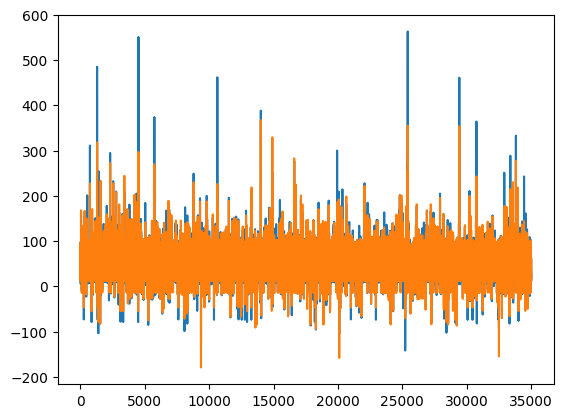

In [48]:
plt.plot(y_test)
plt.plot(gbr_pred)
plt.show()

# Fine Tuning the Optimal Models with best results 

## GradientBoostingRegressor

In [49]:
# from sklearn.model_selection import GridSearchCV
# gbr_fine_tuned = GradientBoostingRegressor()

# param_grid = {
#     'n_estimators': [50,100,200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=gbr_fine_tuned,
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     n_jobs=-1,
#     verbose=2,
# )

# # Fit the model with hyperparameter tuning
# grid_search.fit(X_train, y_train)

##grid_search.best_params_ = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}

In [50]:
# # Get the best parameters and best model
# best_params = grid_search.best_params_
# # best_model = grid_search.best_estimator_
# print(best_params)


In [51]:
best_gbr_model = GradientBoostingRegressor(learning_rate= 0.1, max_depth=5, min_samples_split=10, n_estimators=200)
best_gbr_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, min_samples_split=10, n_estimators=200)

In [52]:
best_gbr_pred = best_gbr_model.predict(X_test)
print(r2_score(y_test,best_gbr_pred))

0.9536491781330612


## XGBRegressor

In [53]:
# from sklearn.model_selection import GridSearchCV
# xgb_fine_tuned = XGBRegressor()

# # Define a grid of parameters to search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# # # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=xgb_fine_tuned,
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',  
#     cv=5,  
#     n_jobs=-1,  
#     verbose=2,  
# )

# # # Fit the model
# grid_search.fit(X_train, y_train)

In [54]:
# Get the best parameters and best model
# best_xgb_params = grid_search.best_params_
# # best_model = grid_search.best_estimator_
# print(best_xgb_params)
# grid_search.best_params_'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0

In [55]:
best_xgb_model= XGBRegressor(colsample_bytree=0.9,learning_rate=0.1,max_depth=5,n_estimators=300,subsample=1.0)
best_xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [56]:
best_xgb_pred = best_xgb_model.predict(X_test)
print(r2_score(y_test,best_xgb_pred))

0.9576617728418819


### Since XGBRegressor gives best r2_score, we'll choose that

# Finding predictions of data given in test.csv

In [57]:
validation_y=best_xgb_model.predict(validation_test)
print(validation_y)

[34.455135 25.7525   15.813098 ... 20.608189 36.02971  17.25323 ]


## Submission of predictions

In [58]:
submission=pd.DataFrame(validation_y,columns=['total_amount'])
submission.index = range(1,len(submission)+1)
print(submission.head(10))

    total_amount
1      34.455135
2      25.752501
3      15.813098
4      15.025667
5      25.770967
6      13.660231
7     122.748795
8      23.662657
9      17.087934
10     14.296082


In [59]:
submission.to_csv('/kaggle/working/submission.csv',sep=',',index=True,index_label='ID',encoding='utf-8')

In [60]:
submit=pd.read_csv('/kaggle/working/submission.csv')
print(submit.head(10))

   ID  total_amount
0   1     34.455135
1   2     25.752500
2   3     15.813098
3   4     15.025667
4   5     25.770967
5   6     13.660231
6   7    122.748795
7   8     23.662657
8   9     17.087934
9  10     14.296082
